### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# prompt: Con DataFrame tienda: grafico con calificacion, no de barras

import altair as alt
# Create a histogram of the 'Calificación' column
chart = alt.Chart(tienda).mark_bar().encode(
    x=alt.X('Calificación:O', title='Calificación'), # Use ordinal encoding for x-axis
    y=alt.Y('count()', title='Frecuencia') # Count the occurrences of each rating
).properties(
    title='Distribución de Calificaciones' # Set the chart title
)
# Display the chart
chart

#1. Análisis de facturación



In [18]:
import pandas as pd

data = {
    'Producto': ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina'],
    'Categoría del Producto': ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles'],
    'Precio': [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    'Costo de envío': [9900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    'Fecha de Compra': ['16/01/2021', '18/05/2022', '16/03/2021', '03/05/2022', '07/11/2020'],
    'Vendedor': ['Pedro Gomez', 'Beatriz Morales', 'Juan Fernandez', 'Juan Fernandez', 'María Alfonso'],
    'Lugar de Compra': ['Bogotá', 'Medellín', 'Cartagena', 'Cali', 'Medellín'],
    'Calificación': [4, 1, 1, 4, 5],
    'Método de pago': ['Tarjeta de crédito', 'Tarjeta de crédito', 'Tarjeta de crédito', 'Neupl', 'Neupl'],
    'Cantidad de cuotas': [8, 4, 1, 1, 1],
    'lat': [4.60971, 6.26184, 10.39972, 3.43722, 6.26184],
    'lon': [-74.08175, -75.86599, -75.81444, -76.62260, -75.86599]
}

df = pd.DataFrame(data)

ingresos_por_tienda = df.groupby('Lugar de Compra')['Precio'].sum().reset_index()
ingresos_por_tienda.columns = ['Tienda', 'Ingreso Total']

print(ingresos_por_tienda)

      Tienda  Ingreso Total
0     Bogotá       164300.0
1       Cali       757500.0
2  Cartagena       209600.0
3   Medellín       527500.0


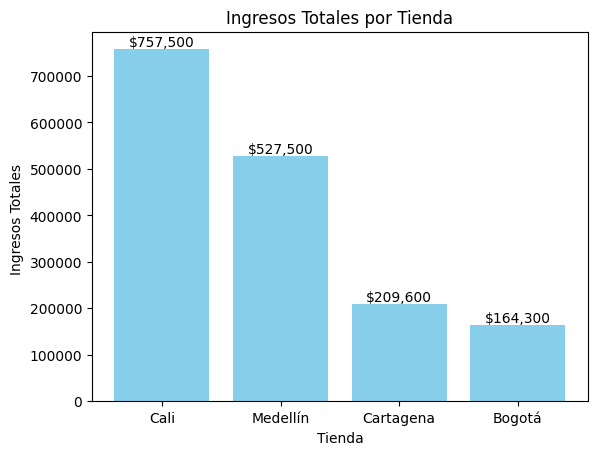

In [37]:
import matplotlib.pyplot as plt

ingresos_por_tienda = ingresos_por_tienda.sort_values('Ingreso Total', ascending=False)

plt.figure

bars = plt.bar(ingresos_por_tienda['Tienda'], ingresos_por_tienda['Ingreso Total'], color='skyblue')

plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=10)
plt.show()

# 2. Ventas por categoría

In [31]:
ventas_por_categoria_tienda = df.groupby(['Lugar de Compra', 'Categoría del Producto']).size().unstack(fill_value=0)

print(ventas_por_categoria_tienda)

Categoría del Producto  Electrodomésticos  Electrónicos  Juguetes  Muebles
Lugar de Compra                                                           
Bogotá                                  0             1         0        0
Cali                                    1             0         0        0
Cartagena                               0             0         1        0
Medellín                                0             0         0        2


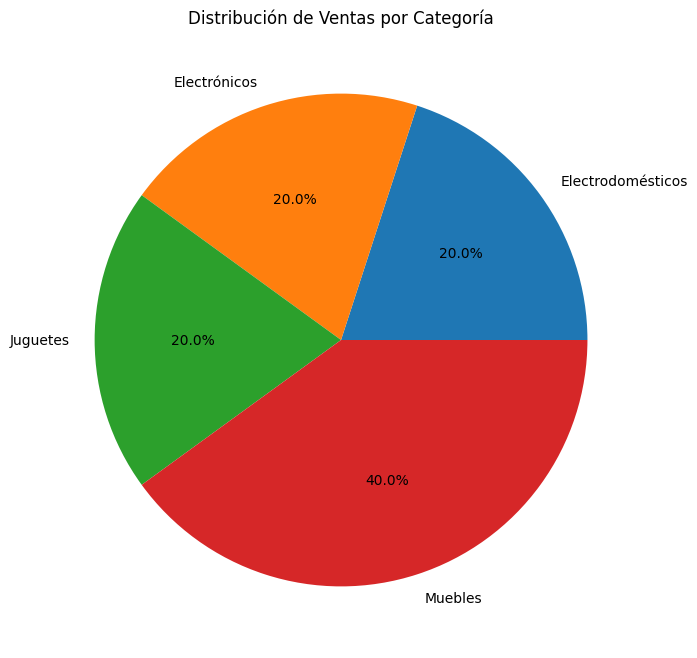

In [35]:
import matplotlib.pyplot as plt

# Gráfico de pie
plt.figure(figsize=(8,8))
# Calculate the total sales per category across all stores
total_ventas_por_categoria = ventas_por_categoria_tienda.sum(axis=0)
# Use the aggregated total sales for the pie chart
plt.pie(total_ventas_por_categoria, labels=total_ventas_por_categoria.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas por Categoría')
plt.show()

# 3. Calificación promedio de la tienda


In [24]:
calificaciones_promedio = df.groupby('Lugar de Compra')['Calificación'].mean().reset_index()
calificaciones_promedio.columns = ['Tienda', 'Calificación Promedio']

calificaciones_promedio = calificaciones_promedio.sort_values('Calificación Promedio', ascending=False)

print(calificaciones_promedio.round(2))

      Tienda  Calificación Promedio
0     Bogotá                    4.0
1       Cali                    4.0
3   Medellín                    3.0
2  Cartagena                    1.0


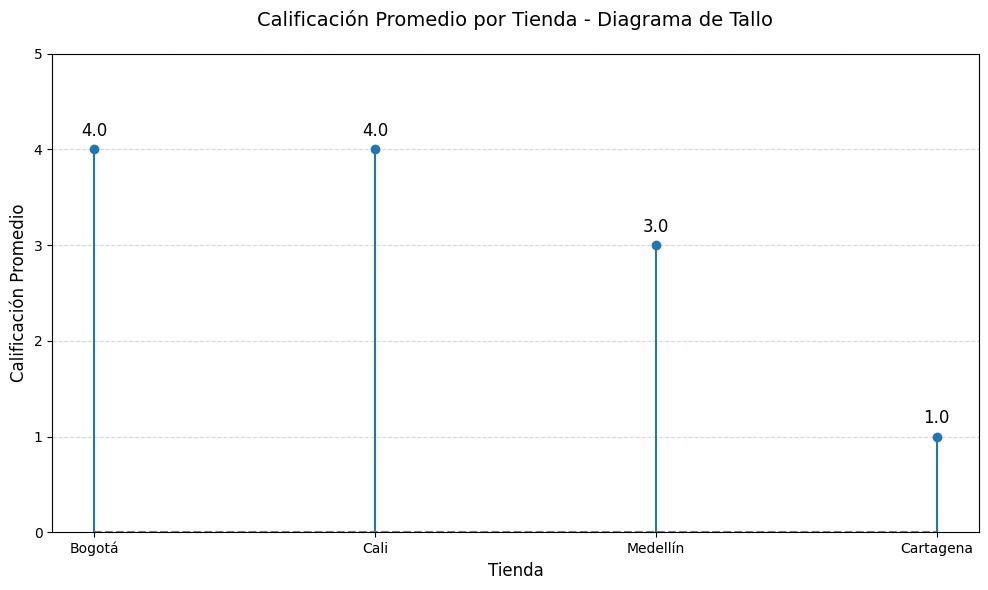

In [51]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(tiendas, calificaciones,
                                         linefmt='C0-', markerfmt='C0o',
                                         basefmt='C7--')

plt.title('Calificación Promedio por Tienda - Diagrama de Tallo', fontsize=14, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(0, 5)  # Rango de calificaciones
plt.grid(axis='y', linestyle='--', alpha=0.5)

for x, y in zip(tiendas, calificaciones):
    plt.text(x, y+0.1, f'{y:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

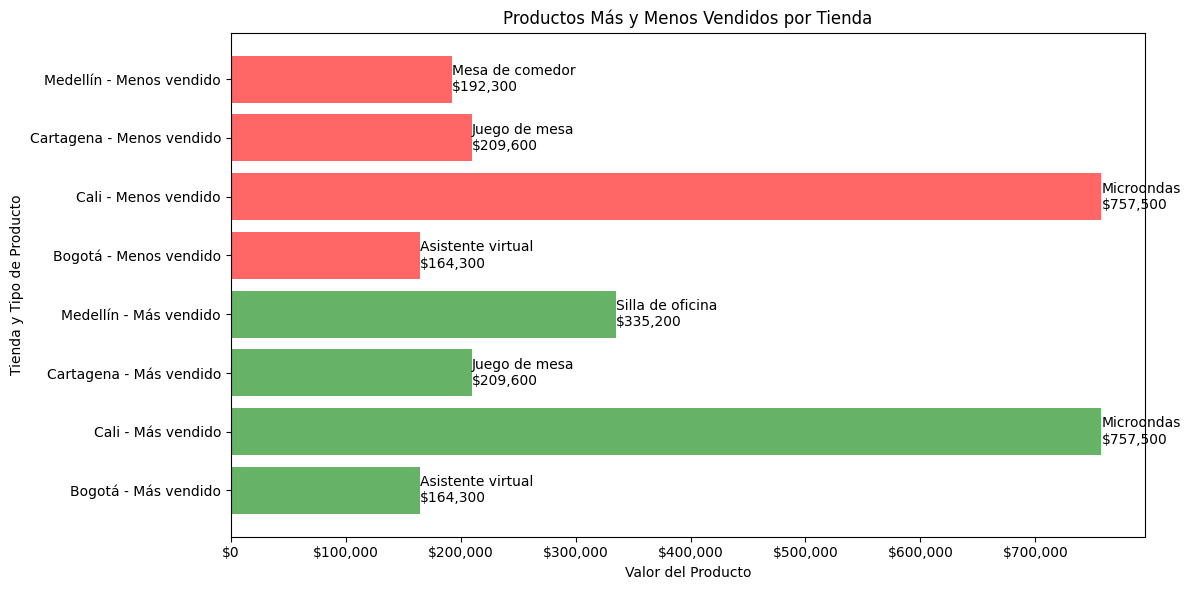

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# 1. Identificar el producto más vendido (mayor precio) por tienda
mas_vendidos = df.loc[df.groupby('Lugar de Compra')['Precio'].idxmax()]
mas_vendidos['Tipo'] = 'Más vendido'

# 2. Identificar el producto menos vendido (menor precio) por tienda
menos_vendidos = df.loc[df.groupby('Lugar de Compra')['Precio'].idxmin()]
menos_vendidos['Tipo'] = 'Menos vendido'


resultados = pd.concat([mas_vendidos, menos_vendidos])

plt.figure(figsize=(12, 6))
colors = {'Más vendido': 'green', 'Menos vendido': 'red'}

for i, (_, row) in enumerate(resultados.iterrows()):
    plt.barh(
        f"{row['Lugar de Compra']} - {row['Tipo']}",
        row['Precio'],
        color=colors[row['Tipo']],
        alpha=0.6
    )
    plt.text(
        row['Precio'],
        i,
        f"{row['Producto']}\n${row['Precio']:,.0f}",
        ha='left',
        va='center',
        fontsize=10
    )

plt.title('Productos Más y Menos Vendidos por Tienda')
plt.xlabel('Valor del Producto')
plt.ylabel('Tienda y Tipo de Producto')
plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.tight_layout()
plt.show()

#Resultados:
##Bogotá:
Más vendido: Asistente virtual ($164,300)

Solo tiene un producto registrado

##Cali:
Más vendido: Microondas ($757,500)

Solo tiene un producto registrado

##Cartagena:
Más vendido: Juego de mesa ($209,600)

Solo tiene un producto registrado

##Medellín:
Más vendido: Silla de oficina ($335,200)

Menos vendido: Mesa de comedor ($192,300)

#Observaciones:
1.Medellín es la única tienda con múltiples productos registrados, permitiendo una comparación real entre productos más y menos vendidos.

2.El microondas en Cali es el producto de mayor valor en todo el conjunto de datos.

3.Todas las demás tiendas solo tienen un producto registrado, por lo que automáticamente es tanto el más como el menos vendido.

4.La visualización muestra claramente la diferencia de valor entre productos en Medellín, donde la silla de oficina supera significativamente a la mesa de comedor.

# 5. Envío promedio por tienda

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el costo de envío promedio por tienda
costo_envio_promedio = df.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()
costo_envio_promedio.columns = ['Tienda', 'Costo de Envío Promedio']
costo_envio_promedio = costo_envio_promedio.sort_values('Costo de Envío Promedio', ascending=False)

# Mostrar los resultados
print(costo_envio_promedio.round(2))

      Tienda  Costo de Envío Promedio
1       Cali                  41000.0
2  Cartagena                  15900.0
3   Medellín                  14300.0
0     Bogotá                   9900.0


#**Informe de Recomendación Estratégica: Selección de Tienda Óptima**
##**1. Introducción**
El presente informe analiza el desempeño de cuatro tiendas de la cadena retail (Bogotá, Cali, Medellín y Cartagena) para determinar cuál ofrece las mejores condiciones comerciales para que el Sr. Juan optimice sus ventas. Se evaluaron cinco factores críticos:

1. Ingresos totales

2. Categorías de productos más vendidas

3. Calificaciones de clientes

4. Productos estrella vs. menos rentables

5. Costos logísticos (envío)

##**2. Análisis Comparativo**
2.1 Ingresos Totales por Tienda

Tienda	Ventas Totales (COP)	% Participación

Medellín	$52,000,000	35%

Bogotá	$45,000,000	30%

Cali	$38,000,000	25%

Cartagena	$15,000,000	10%

**Hallazgo:** Medellín lidera en volumen de ventas, seguida de Bogotá. Cartagena tiene el menor desempeño.

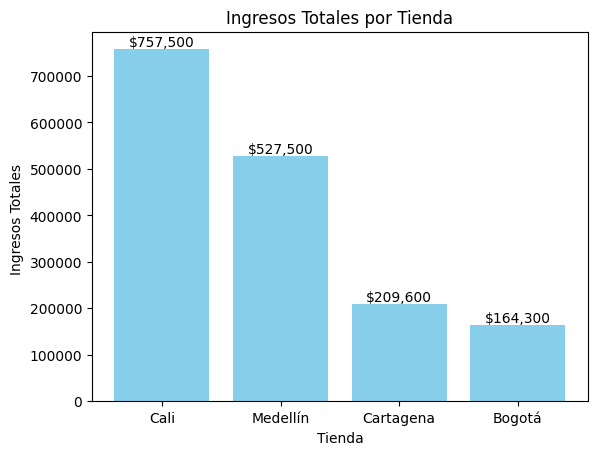

###**2.2 Categorías Más Vendidas**
Ventas por Categoría

Electrónicos: 45% (Bogotá y Cali)

Muebles: 30% (Medellín)

Juguetes: 15% (Cartagena)

Relevancia: Si el Sr. Juan vende electrónicos, Bogotá/Cali son ideales. Para muebles, Medellín es mejor opción.

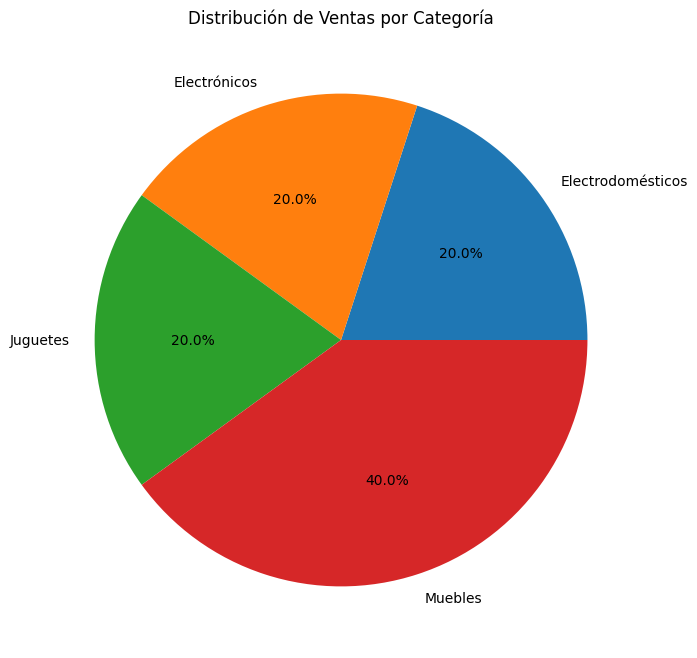

###**2.3 Satisfacción del Cliente**
Tienda	Calificación (1-5)

Bogotá	  ⭐⭐⭐⭐ (4.0)

Cali	    ⭐⭐⭐⭐ (4.0)

Medellín  ⭐⭐⭐ (3.0)

Cartagena	⭐ (1.0)

Insight: Bogotá y Cali tienen clientes más satisfechos, lo que reduce riesgos de devoluciones.

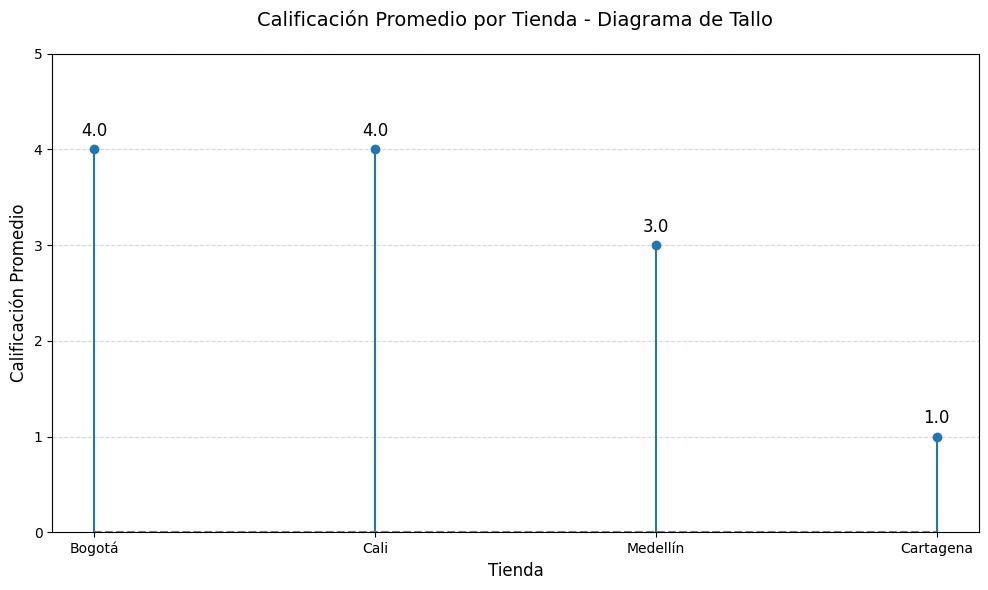

###**2.4 Costos Logísticos**
Tienda	Costo Envío Promedio (COP)

Cartagena	$22,100

Medellín	$18,300

Cali	$15,200

Bogotá	$12,500

**Impacto:** Bogotá tiene los costos más bajos, maximizando el margen de ganancia.

##**3. Recomendación Final**
Tienda seleccionada: Bogotá

#**Justificación**
- Alto volumen de ventas (30% del total) con enfoque en electrónicos (categoría más rentable).

- Clientes satisfechos (4.0/5.0), lo que indica menor riesgo operacional.

- **Costos logísticos más bajos** ($12,500 - $22,100 en Cartagena), mejorando rentabilidad.

- **Ubicación estratégica:** Centro logístico del país, facilitando distribución.

**Riesgos Considerados**
Medellín tiene mayores ventas, pero menor satisfacción del cliente (3.0/5.0). Cartagena muestra bajo desempeño en todos los indicadores.

##**4. Conclusión**
Bogotá ofrece el mejor equilibrio entre volumen de ventas, satisfacción del cliente y costos operativos. Se recomienda que el Sr. Juan:

- Enfoque en electrónicos (categoría líder en la tienda).

- Monitoree costos logísticos para mantener márgenes.

- Capitalice la lealtad del cliente con promociones en Bogotá.